**Imports**

In [1]:
import os # TEST
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import csv
import string
import numpy as np

In [2]:
# Define root directory
root_dir = './dataset'
sub_dir_training = "train"
# sub_dir_training_cats = 

sub_dir_testing = "test"
# sub_dir_testing_cats = "cats"
# sub_dir_testing_dogs = "dogs"

In [3]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./dataset\test
./dataset\train
./dataset\test\air
./dataset\test\anggur
./dataset\test\apel
./dataset\test\ayam_goreng
./dataset\test\bakso
./dataset\test\bakwan
./dataset\test\batagor
./dataset\test\bubur_ayam
./dataset\test\burger
./dataset\test\cakwe
./dataset\test\capcay
./dataset\test\cumi_goreng_tepung
./dataset\test\dendeng_sapi
./dataset\test\donat_kentang_polos
./dataset\test\es_campur
./dataset\test\fuyunghai
./dataset\test\gudeg
./dataset\test\ikan_goreng
./dataset\test\kentang_balado
./dataset\test\kerupuk
./dataset\test\nasi_goreng
./dataset\test\rendang
./dataset\test\sate_ayam_kacang
./dataset\test\telur_balado
./dataset\test\tempe_goreng
./dataset\train\air
./dataset\train\anggur
./dataset\train\apel
./dataset\train\ayam_goreng
./dataset\train\bakso
./dataset\train\bakwan
./dataset\train\batagor
./dataset\train\bubur_ayam
./dataset\train\burger
./dataset\train\cakwe
./dataset\train\capcay
./dataset\train\cumi_goreng_tepung
./dataset\train\dendeng_sapi
./dataset\train\do

In [6]:
#Callbacks
from keras.callbacks import ReduceLROnPlateau

class customCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check accuracy
    if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') < 0.6):
      print("\nSign of overfit! Stopping the epoch early ...")
      self.model.stop_training = True
    elif(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
      print("\nModel is good enough. Stopping the epoch early ...")
      self.model.stop_training = True

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                  patience=5, verbose=1,),
             customCallbacks()]

In [28]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      class_mode = 'categorical',
                                                      batch_size=32,
                                                      target_size=(128, 128),
                                                      color_mode='rgb')

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode = 'categorical',
                                                                target_size=(128, 128),
                                                                color_mode='rgb')
  ### END CODE HERE
  return train_generator, validation_generator

In [29]:
train_generator, validation_generator = train_val_generators('./dataset/train', './dataset/test')

Found 1250 images belonging to 25 classes.
Found 250 images belonging to 25 classes.


In [101]:
from keras.optimizers import RMSprop
from tensorflow.python.keras import regularizers


def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                               input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Dense(25, activation='softmax')

    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, 
                                                        centered=True), 
                  metrics=['accuracy'])

    return model


In [102]:
model = create_model()

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 128)     

In [103]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(train_generator,
                    epochs=300,
                    validation_data=validation_generator,
                    shuffle = True,
                    verbose = 1)

Epoch 1/300
40/40 [==============================] - 39s 894ms/step - loss: 3.1901 - accuracy: 0.0616 - val_loss: 3.0230 - val_accuracy: 0.0920
Epoch 2/300
40/40 [==============================] - 34s 852ms/step - loss: 3.0187 - accuracy: 0.0880 - val_loss: 2.8809 - val_accuracy: 0.1200
Epoch 3/300
40/40 [==============================] - 35s 862ms/step - loss: 2.9487 - accuracy: 0.0992 - val_loss: 2.8667 - val_accuracy: 0.1440
Epoch 4/300
40/40 [==============================] - 34s 850ms/step - loss: 2.8909 - accuracy: 0.1184 - val_loss: 2.7200 - val_accuracy: 0.1600
Epoch 5/300
40/40 [==============================] - 35s 881ms/step - loss: 2.8291 - accuracy: 0.1432 - val_loss: 2.6775 - val_accuracy: 0.2000
Epoch 6/300
40/40 [==============================] - 35s 876ms/step - loss: 2.8115 - accuracy: 0.1568 - val_loss: 2.7346 - val_accuracy: 0.1920
Epoch 7/300
40/40 [==============================] - 35s 881ms/step - loss: 2.7809 - accuracy: 0.1392 - val_loss: 2.5908 - val_accuracy:

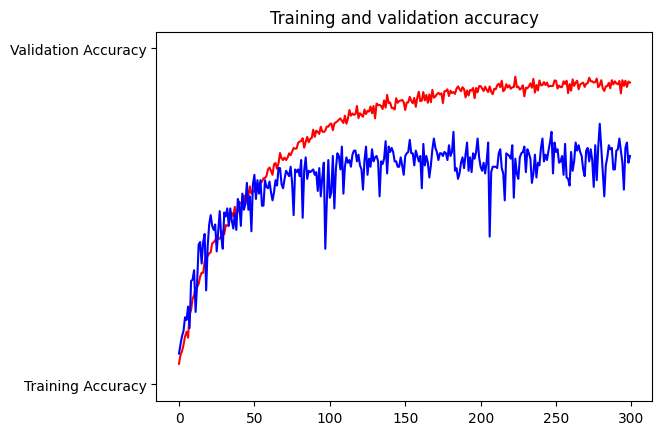

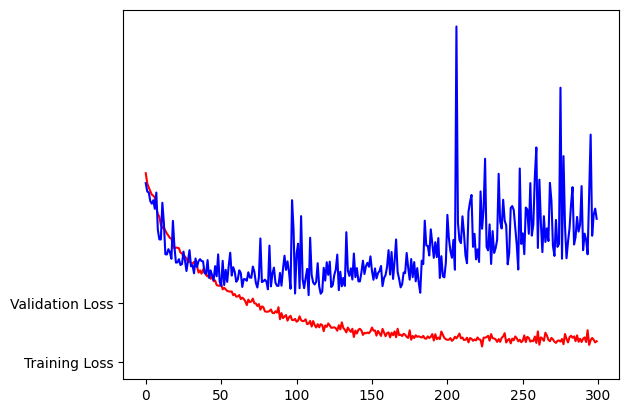

In [104]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

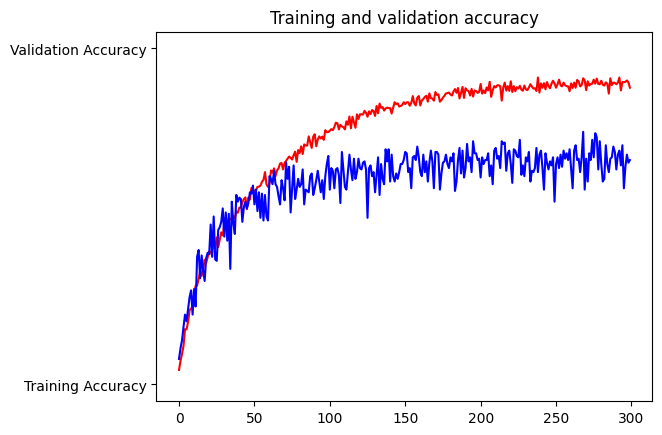

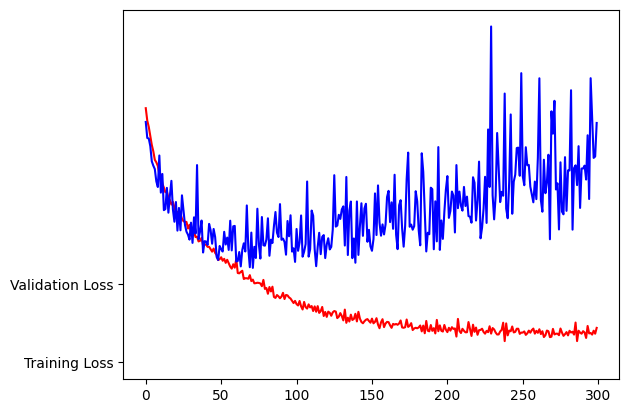

In [58]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [59]:
model.evaluate(train_generator)
model.evaluate(validation_generator)

8/8 [==============================] - 2s 185ms/step - loss: 3.0513 - accuracy: 0.6680


[3.051342487335205, 0.6679999828338623]

In [60]:
from tensorflow import lite
from tensorflow import keras
# from tflite_model_maker.config import ExportFormat

keras_file = "food_keras_v7.h5"
keras.models.save_model(model, keras_file)

converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("food_tflite_v7.tflite", "wb").write(tflite_model)


# model_3.export(export_dir='.', export_format=[ExportFormat.TFLITE])


INFO:tensorflow:Assets written to: C:\Users\ghait\AppData\Local\Temp\tmpixs_oj7g\assets


INFO:tensorflow:Assets written to: C:\Users\ghait\AppData\Local\Temp\tmpixs_oj7g\assets


1506076

In [54]:
model.evaluate(train_generator)
model.evaluate(validation_generator)

8/8 [==============================] - 2s 214ms/step - loss: 1.5125 - accuracy: 0.6320


[1.5125224590301514, 0.6320000290870667]

In [40]:
lines = []
labels = []
with open('./classes_v2.txt') as f:
    lines = f.readlines()

for className in lines:
  labels.append(className.strip('\n'))

print(labels)

['air', 'anggur', 'apel', 'ayam_goreng', 'bakso', 'bakwan', 'batagor', 'bubur_ayam', 'burger', 'cakwe', 'capcay', 'cumi_goreng_tepung', 'dendeng_sapi', 'donat_kentang_polos', 'es_campur', 'fuyunghai', 'gudeg', 'ikan_goreng', 'kentang_balado', 'kerupuk', 'nasi_goreng', 'rendang', 'sate_ayam_kacang', 'telur_balado', 'tempe_goreng']


In [98]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

img = load_img("./dataset/test/ikan_goreng/ikan_test (3).jpg", target_size=(128, 128))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
# img_preprocessed = preprocess_input(x)
prediction = model.predict(x)
print(prediction.)

# images = np.vstack([x])
# classes = model.predict(images)
# print(classes[0])

idx = 0
for i in prediction[0]:
    if i == 1:
        print(idx)
        print(labels[idx])
    idx += 1

1/1 [==============================] - 0s 34ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
1
anggur
